In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('student_debt.csv')
df

,Year,Debt
0,2004.2,0.26
1,2004.5,0.26
2,2004.8,0.33
3,2005.0,0.35
4,2005.2,0.36
5,2005.5,0.37
6,2005.8,0.38
7,2006.0,0.39
8,2006.2,0.43
9,2006.5,0.44


In [4]:
df['YearsSince2004'] = df['Year'] - 2004
df

,Year,Debt,YearsSince2004
0,2004.2,0.26,0.2
1,2004.5,0.26,0.5
2,2004.8,0.33,0.8
3,2005.0,0.35,1.0
4,2005.2,0.36,1.2
5,2005.5,0.37,1.5
6,2005.8,0.38,1.8
7,2006.0,0.39,2.0
8,2006.2,0.43,2.2
9,2006.5,0.44,2.5


In [5]:
#define number of entries M
m = len(df['Year'])
print(m)
print(df['Year'][1])

40
2004.5


In [6]:
#compute summations of x_m, y_m, x^2_m, x_m*y_m where M is number of entries
xbar = 0
ybar = 0
xybar = 0
x2bar = 0
for i in range(0, m):
    xbar = xbar + df['YearsSince2004'][i]
    ybar = ybar + df['Debt'][i]
    x2bar = x2bar + df['YearsSince2004'][i] ** 2
    xybar = xybar + df['Debt'][i] * df['YearsSince2004'][i]
print(xbar)
print(ybar)
print(xybar)
print(x2bar)

205.0
26.11
160.61599999999999
1384.2999999999993


In [7]:
#compute estimated least squares solution vector a1hat and a2hat from formula
det = (x2bar - m * xbar ** 2)
a1hat = (xybar - m * xbar * ybar) / det
a2hat = (ybar * x2bar - xbar * xybar) / det
print(a1hat, '\n', a2hat)

0.12737519898152894 
 -0.0019157912134305385


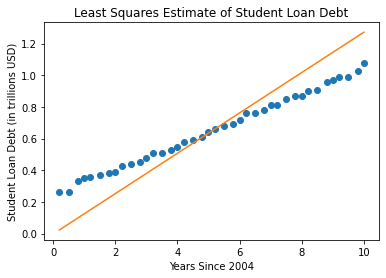

In [8]:
#plot points and least squares estimate
import matplotlib.pyplot as plt
plt.plot(df['YearsSince2004'], df['Debt'], 'o')
plt.plot(df['YearsSince2004'], df['YearsSince2004'] * a1hat + a2hat)
plt.title('Least Squares Estimate of Student Loan Debt')
plt.xlabel('Years Since 2004')
plt.ylabel('Student Loan Debt (in trillions USD)')
plt.savefig('loandebt.jpg')

To estimate student loan debt in 2021, we plug in 17 to the formula, as the calculations are based on years since 2021

In [11]:
17 * a1hat + a2hat

2.163462591472561

The estimate seems to be a bit high($ \$ $2.16 trillion), as current student debt is closer to $ \$ $1.7 trillion

Now to predict student debt in 2041, plug in 37 years past 2004

In [12]:
37 * a1hat + a2hat

4.710966571103141

The least squares estimate for 2041 is $ \$ $4.71 trillion, though my confidence in the accuracy of this estimate is low, as it is 27 years after the latest data point considered in the regression model, which was already $ \$ $0.4 trillion off in 2021.